## Train a  Bernoulli-Bernoulli RBM (BBRBM) to reconstruct img

In [1]:
import numpy as np
import timeit
from tfrbm.bbrbm import BBRBM
import matplotlib.pyplot as plt

In [2]:
bm = BBRBM(n_visible=16,n_hidden= 61)
bm.image_height = 4

### dataset[i][0] xor dataset[i][1] = dataset[i][2]

In [3]:
f = open("/Users/shitian.ni/dwave/CFQIRBM/4x4.txt")
dataset = np.array([[int(data) for data in f.read() if data in "01"]])

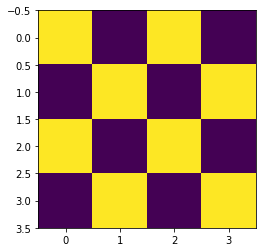

In [4]:
plt.figure()
plt.imshow(dataset[0].reshape(bm.image_height, -1))

Stopped training early because the model can reconstruct the inputs


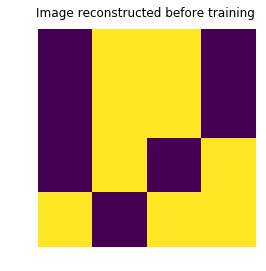

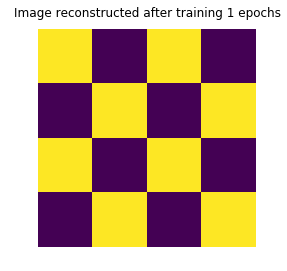

In [5]:
err = bm.fit(dataset, n_epoches=50, learning_rate = 5, decay = 0.01, epochs_to_test = 1)